In [1]:
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 3.9 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Reading the files 
df_hindi = pd.read_csv('Cleaned_Movie_Data/cleaned_bollywood_movies.csv')
df_telugu = pd.read_csv('Cleaned_Movie_Data/cleaned_tollywood_movies.csv')
df_indian = pd.read_csv('Cleaned_Movie_Data/cleaned_indian_movies.csv')

In [10]:
# A new column called ROI where profit = boxoffice - budget , and it is divided by budget 
df_hindi['ROI'] = (df_hindi['BoxOffice (Crores)'] - df_hindi['Budget (Crores)']) / df_hindi['Budget (Crores)']
df_telugu['ROI'] = (df_telugu['BoxOffice (Crores)'] - df_telugu['Budget (Crores)']) / df_telugu['Budget (Crores)']
df_indian['ROI'] = (df_indian['BoxOffice (Crores)'] - df_indian['Budget (Crores)']) / df_indian['Budget (Crores)']


In [11]:
# Rounding off the values
df_hindi['ROI'] = round(df_hindi['ROI'],2)
df_telugu['ROI'] = round(df_telugu['ROI'],2)
df_indian['ROI'] = round(df_indian['ROI'],2)

In [13]:
# Finding top 3 Hindi films(ROI wise) uisng filters of only choosing where language is hindi and then sorting and finally choosing top_3
top_3_hindi = df_hindi[df_hindi['Language'] == 'hindi'].sort_values('ROI', ascending=False).head(3)
top_3_hindi


,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany,ROI
5,6,MOV007,Dangal,Nitesh Tiwari,Biographical Sports Drama,2016,70,2140,8.1,161,Aamir Khan,Fatima Sana Shaikh,hindi,Aamir Khan Productions,29.57
17,40,MOV041,Dilwale Dulhania Le Jayenge,Aditya Chopra,Romance,1995,4,61,7.7,189,Shah Rukh Khan,Kajol,hindi,Yash Raj Films,14.25
19,44,MOV045,3 Idiots,Rajkumar Hirani,Comedy Drama,2009,35,460,8.4,171,Aamir Khan,Kareena Kapoor,hindi,Vidhu Vinod Chopra Productions,12.14


In [14]:
# Finding top 3 Telugu films(ROI wise) by sorting and finally choosing top_3
top_3_telugu = df_telugu.sort_values('ROI', ascending=False).head(3)
top_3_telugu


,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany,ROI
4,4,TOLLY005,NaN,NaN,Romantic Comedy,2018,10,130,7.8,148,Vijay Deverakonda,Rashmika Mandanna,Telugu,GA2 Pictures,12.00
0,0,TOLLY001,NaN,NaN,Epic Fantasy Action,2017,250,1810,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works,6.24
1,1,TOLLY002,NaN,NaN,Epic Fantasy Action,2015,180,650,8.1,159,Prabhas,Tamannaah,Telugu,Arka Media Works,2.61


In [15]:
# Used a dataframe to merge all 3 dfs to find top 3 across all languages
df_all = pd.concat([df_hindi, df_telugu, df_indian], ignore_index = True)


In [16]:
# Sorting and selecting top 3 of all languages df
top_3_all = df_all.sort_values('ROI', ascending=False).head(3)
top_3_all


,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany,ROI
5,6,MOV007,Dangal,Nitesh Tiwari,Biographical Sports Drama,2016,70,2140,8.1,161,Aamir Khan,Fatima Sana Shaikh,hindi,Aamir Khan Productions,29.57
17,40,MOV041,Dilwale Dulhania Le Jayenge,Aditya Chopra,Romance,1995,4,61,7.7,189,Shah Rukh Khan,Kajol,hindi,Yash Raj Films,14.25
19,44,MOV045,3 Idiots,Rajkumar Hirani,Comedy Drama,2009,35,460,8.4,171,Aamir Khan,Kareena Kapoor,hindi,Vidhu Vinod Chopra Productions,12.14


<Axes: title={'center': 'ROI for top 3 hindi films'}, xlabel='Title'>

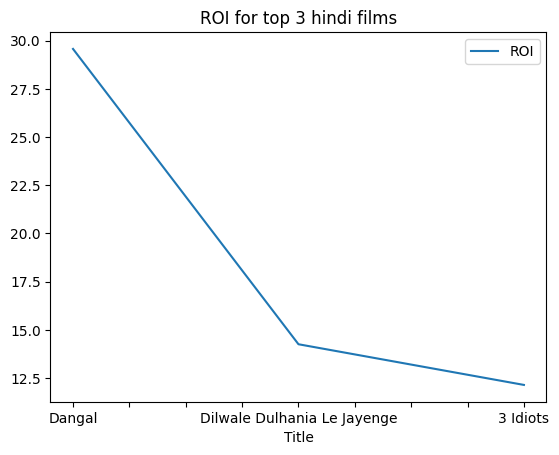

In [17]:
# Plotting a line graph of ROI against respective movies
top_3_hindi.plot(x='Title', y=['ROI'], kind='line', title = 'ROI for top 3 hindi films')

<Axes: title={'center': 'ROI for top 3 films'}, xlabel='Title'>

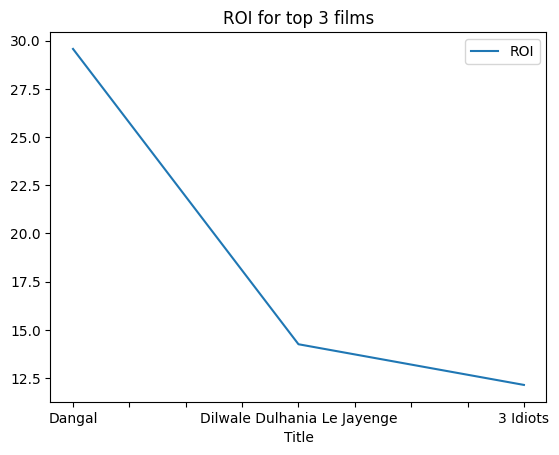

In [19]:
# Plotting a line graph of ROI against respective movies
top_3_all.plot(x='Title', y=['ROI'], kind='line',  title = 'ROI for top 3 films')